### Import libraries

In [16]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.compose import make_column_transformer

### Import files

In [17]:
anime_data = pd.read_csv('../anime_cleaned.csv')

### Removing some blank data

In [18]:
anime_data['episodes'].replace('', np.nan, inplace=True)
anime_data.dropna(subset=['episodes'], inplace=True)
anime_data['episodes'] = anime_data['episodes'].astype('int64')

### Init

In [19]:
linreg = LinearRegression()
gbm = GradientBoostingRegressor()

In [20]:
boardcast_cat = ['Sundays',
                 'Mondays',
                 'Tuesdays',
                 'Wednesdays',
                 'Thursdays',
                 'Fridays',
                 'Saturdays',
                 'Not schedule',
                 'Unknown']

### Helper function

In [27]:
def linear_regression(predictors, numeric_predictors, cat_predictors_nominal, cat_predictors_ordinal, response):
    # Extract Response and Predictors
    y = pd.DataFrame(anime_data[response])
    X = pd.DataFrame(anime_data[predictors])

    oe = OrdinalEncoder(categories=[boardcast_cat])
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    
    oe.fit_transform(X[cat_predictors_ordinal])
    ohe.fit_transform(X[cat_predictors_nominal])

    column_transformer = make_column_transformer(
        (RobustScaler(), numeric_predictors),
        (oe, cat_predictors_ordinal),
        (ohe, cat_predictors_nominal))
        
    column_transformer.fit_transform(X)
    
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    # Linear Regression using Train Data
    lm_pipeline = make_pipeline(column_transformer, linreg)
    gbm_pipeline = make_pipeline(column_transformer, gbm)
    gbm_pipeline.fit(X_train, y_train)
    lm_pipeline.fit(X_train, y_train)        
    
    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()
    
    # Print the Coefficients against Predictors
    print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
    print()
    
    # Predict Response corresponding to Predictors
    y_train_pred = lm_pipeline.predict(X_train)
    y_test_pred =  lm_pipeline.predict(X_test)

    y_gbm_train_pred = gbm_pipeline.predict(X_train)
    y_gbm_test_pred = gbm_pipeline.predict(X_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(2, 2, figsize=(24, 12))
    axes[0][0].scatter(y_train, y_train_pred, color = "blue")
    axes[0][0].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0][0].set_xlabel("True values of the Response Variable (Train)")
    axes[0][0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1][0].scatter(y_test, y_test_pred, color = "green")
    axes[1][0].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1][0].set_xlabel("True values of the Response Variable (Test)")
    axes[1][0].set_ylabel("Predicted values of the Response Variable (Test)")

    axes[0][1].scatter(y_train, y_gbm_train_pred, color = "blue")
    axes[0][1].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0][1].set_xlabel("GB True values of the Response Variable (Train)")
    axes[0][1].set_ylabel("GB Predicted values of the Response Variable (Train)")
    axes[1][1].scatter(y_test, y_gbm_test_pred, color = "green")
    axes[1][1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1][1].set_xlabel("GB True values of the Response Variable (Test)")
    axes[1][1].set_ylabel("GB Predicted values of the Response Variable (Test)")
    plt.show()
    
    print("Linear Regression")
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", lm_pipeline.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", lm_pipeline.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

    print("Gradient Boosting")
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", gbm_pipeline.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_gbm_train_pred))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", gbm_pipeline.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_gbm_test_pred))
    print()

    return (lm_pipeline, gbm_pipeline)

### Predicting `score` with `episodes` and `duration`

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Intercept of Regression 	: b =  [7.28028847]
Coefficients of Regression 	: a =  [[-0.48420504  0.01358714  0.05208573  0.00110912 -0.05970681  0.09551783
  -0.18422093  0.3028447  -0.19679876 -0.14252952  0.07083733 -0.30650213
  -0.14753374  0.27967104  0.0132094  -0.03201309  0.16565969 -0.30898127
  -0.01556039 -0.3748253   0.01793334  0.8229986  -0.07829397  0.10319701
  -0.10148939 -0.01469842  0.09576063 -0.00447586  0.04195401  0.09694574
   0.25537553  0.1184476   0.10161346  0.13751245  0.02379486 -0.44826702
   0.09398169  0.1249274  -0.06513378 -0.01398631 -0.20607634 -0.07196925
  -0.24222604  0.053106    0.01425783  0.00236239 -0.05886539  0.07051797
  -0.0282728   0.11376561 -0.02009588  0.05573655  0.03638242  0.04614069
  -0.23192938  0.1353763  -0.1353763   0.09138247 -0.09138247]]

         Predictors  Coefficients
0        popularity     -0.484205
1          duration      0.013587
2   scored_by_users      0.052086
3         broadcast      0.001109
4            source

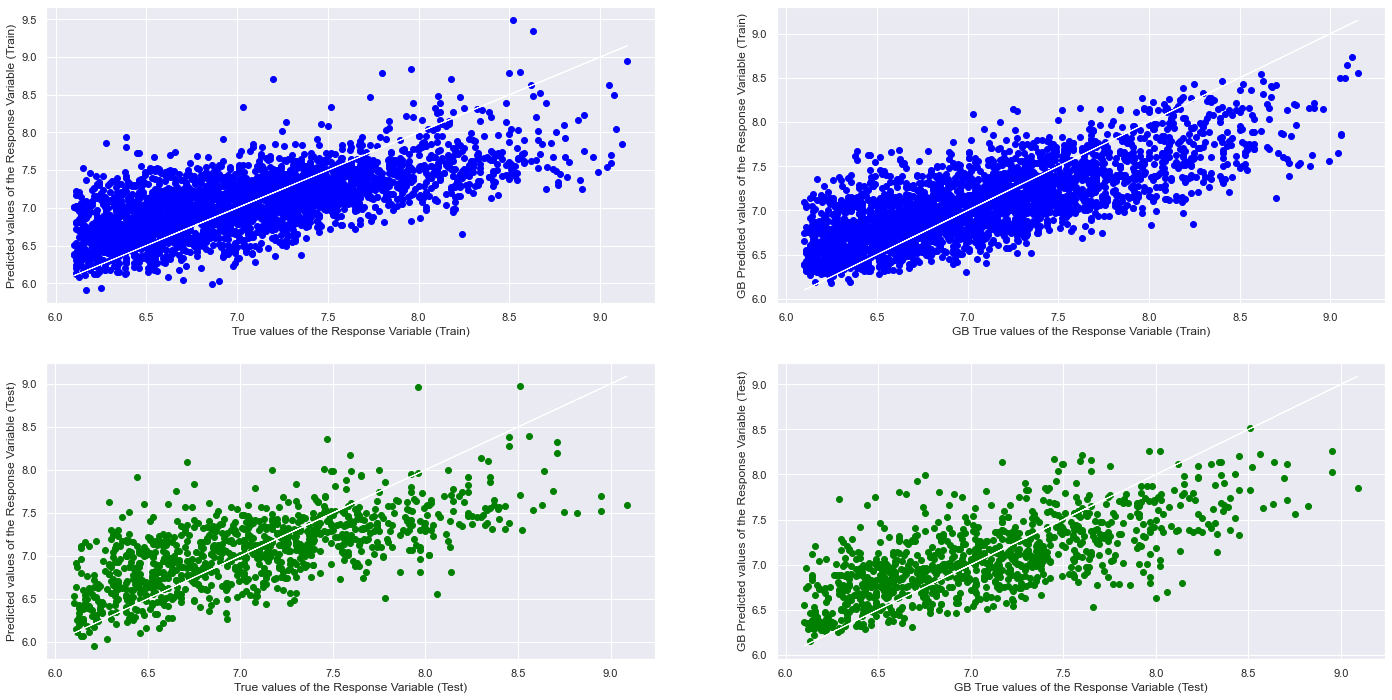

Linear Regression
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.46120527990337823
Mean Squared Error (MSE) 	: 0.2101497827059403

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.446157594445872
Mean Squared Error (MSE) 	: 0.20009058302827476

Gradient Boosting
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5690162424244001
Mean Squared Error (MSE) 	: 0.16809953703343627

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4927780932743916
Mean Squared Error (MSE) 	: 0.18324766399910736



In [28]:
(lm_pipeline, gbm_pipeline) = linear_regression(['popularity', 'duration', 'scored_by_users', 'broadcast', 'source', 'demographic', 'main genre', 'premiered', 'rating', 'status', 'type'],
                                ['popularity', 'duration', 'scored_by_users'], 
                                ['source', 'demographic', 'main genre', 'premiered', 'rating', 'status', 'type'], 
                                ['broadcast'], 'score')

#### Prediction

In [23]:
# Extract Pokemons for Prediction
anime_pred = anime_data[anime_data["title"].isin(["Steins;Gate", "Dr. Stone", "One Piece", "Mobile Suit Gundam 00",
                                                 "Naruto: Shippuuden", "Jujutsu Kaisen", "Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season Part 2", "Magical Nyan Nyan Taruto"])]
anime_pred


,Unnamed: 0,Unnamed: 0.1,rank,title,score,scored_by_users,type,episodes,status,year aired,...,studios,source,genres,main genre,theme,demographic,duration,rating,popularity,url
2,2,2,3,Steins;Gate,9.09,1161139,TV,24,Finished Airing,2011,...,White Fox,Visual novel,"Drama, Sci-Fi, Suspense",Drama,Psychological,All,24,PG-13 - Teens 13 or older,13,https://myanimelist.net/anime/9253/Steins_Gate
43,56,56,107,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,8.51,335734,TV,12,Finished Airing,2021,...,White Fox,Light novel,"Drama, Fantasy, Suspense",Drama,Psychological,All,28,R - 17+ (violence & profanity),244,https://myanimelist.net/anime/42203/Re_Zero_ka...
100,161,161,1062,Jujutsu Kaisen,7.71,9325,ONA,3,Finished Airing,2018,...,Yokohama Animation Lab,Manga,NaN,Unknown,Unknown,Shounen,1,G - All Ages,2918,https://myanimelist.net/anime/38777/Jujutsu_Ka...
650,1184,1184,235,Dr. Stone,8.30,791619,TV,24,Finished Airing,2019,...,TMS Entertainment,Manga,"Adventure, Comedy, Sci-Fi",Adventure,Unknown,Shounen,24,PG-13 - Teens 13 or older,60,https://myanimelist.net/anime/38691/Dr_Stone
938,1739,1739,290,Naruto: Shippuuden,8.23,1201683,TV,500,Finished Airing,2007,...,Studio Pierrot,Manga,"Action, Adventure, Comedy",Action,Unknown,Shounen,23,PG-13 - Teens 13 or older,16,https://myanimelist.net/anime/1735/Naruto__Shi...
1759,3350,3350,401,Mobile Suit Gundam 00,8.12,109152,TV,25,Finished Airing,2007,...,Sunrise,Original,"Action, Drama, Sci-Fi",Action,Unknown,All,24,R - 17+ (violence & profanity),945,https://myanimelist.net/anime/2581/Mobile_Suit...
2277,4467,4467,68,One Piece,8.62,1014947,TV,1013,Currently Airing,1999,...,Toei Animation,Manga,"Action, Adventure, Comedy, Drama, Fantasy",Action,Super Power,Shounen,24,PG-13 - Teens 13 or older,26,https://myanimelist.net/anime/21/One_Piece
3681,7498,7498,7699,Magical Nyan Nyan Taruto,6.21,1741,TV,12,Finished Airing,2001,...,"Madhouse, TNK",Unknown,NaN,Unknown,Unknown,All,22,G - All Ages,6431,https://myanimelist.net/anime/952/Magical_Nyan...


In [24]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(anime_pred[['popularity', 'duration', 'scored_by_users', 'broadcast', 'source', 'demographic', 'main genre', 'premiered', 'rating', 'status', 'type']])

# Predict Response corresponding to Predictors
y_pred = lm_pipeline.predict(X_pred)
gb_y_pred = gbm_pipeline.predict(X_pred)

In [25]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["PredScore"], index = anime_pred.index)
animedata_acc = pd.concat([anime_pred[["title", "score"]], y_pred], axis = 1)

y_errs = 100 * abs(animedata_acc["score"] - animedata_acc["PredScore"]) / animedata_acc["score"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = anime_pred.index)
animedata_acc= pd.concat([animedata_acc, y_errs], axis = 1)

animedata_acc

,title,score,PredScore,Error
2,Steins;Gate,9.09,8.096957,10.924563
43,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,8.51,7.582218,10.902262
100,Jujutsu Kaisen,7.71,7.230398,6.220522
650,Dr. Stone,8.30,8.116289,2.213383
938,Naruto: Shippuuden,8.23,8.425143,2.371120
1759,Mobile Suit Gundam 00,8.12,7.416991,8.657748
2277,One Piece,8.62,8.701547,0.946023
3681,Magical Nyan Nyan Taruto,6.21,6.732185,8.408776


In [26]:
# Summarize the Actuals, Predictions and Errors
gb_y_pred = pd.DataFrame(gb_y_pred, columns = ["PredScore"], index = anime_pred.index)
animedata_acc_gb = pd.concat([anime_pred[["title", "score"]], gb_y_pred], axis = 1)

gb_y_errs = 100 * abs(animedata_acc_gb["score"] - animedata_acc_gb["PredScore"]) / animedata_acc_gb["score"]
gb_y_errs = pd.DataFrame(gb_y_errs, columns = ["Error"], index = anime_pred.index)
animedata_acc_gb= pd.concat([animedata_acc_gb, gb_y_errs], axis = 1)

animedata_acc_gb

,title,score,PredScore,Error
2,Steins;Gate,9.09,8.674483,4.571145
43,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,8.51,7.953614,6.538027
100,Jujutsu Kaisen,7.71,7.045622,8.617097
650,Dr. Stone,8.30,8.017116,3.408239
938,Naruto: Shippuuden,8.23,8.241909,0.144705
1759,Mobile Suit Gundam 00,8.12,7.414248,8.691525
2277,One Piece,8.62,8.440708,2.079957
3681,Magical Nyan Nyan Taruto,6.21,6.732177,8.408655
